In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [100]:
dataset = pd.read_csv("Student_Marks.csv")
dataset

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [102]:
dataset["Marks"]= (dataset["Marks"]-dataset["Marks"].mean())/(dataset["Marks"].max()-dataset["Marks"].min())

In [103]:
dataset["time_study"]= (dataset["time_study"]-dataset["time_study"].mean())/(dataset["time_study"].max()-dataset["time_study"].min())

In [104]:
dataset

,number_courses,time_study,Marks
0,3,0.054810,-0.104965
1,4,-0.506442,-0.335755
2,4,-0.120104,-0.213457
3,6,0.487452,0.575575
4,8,0.474985,0.621479
...,...,...,...
95,6,-0.065658,-0.106454
96,3,-0.480364,-0.378521
97,4,0.392553,0.342651
98,7,-0.479346,-0.249360


In [105]:
x_input= dataset.iloc[:,-2]
x_input

0     0.054810
1    -0.506442
2    -0.120104
3     0.487452
4     0.474985
        ...   
95   -0.065658
96   -0.480364
97    0.392553
98   -0.479346
99    0.287223
Name: time_study, Length: 100, dtype: float64

In [106]:
y_output = dataset.iloc[:,-1]
y_output

0    -0.104965
1    -0.335755
2    -0.213457
3     0.575575
4     0.621479
        ...   
95   -0.106454
96   -0.378521
97    0.342651
98   -0.249360
99    0.159777
Name: Marks, Length: 100, dtype: float64

In [110]:
m = len(x_input)+1

def gradient_descent(alpha,steps):
    theta0 = 0
    theta1 = 0.5
    
    h = np.zeros(len(x_input))
    sum1 = np.zeros(len(x_input))
    for i in range(steps):
        
        for j in range(len(x_input)):
            h[j] = theta0+theta1*x_input[j]
            sum1[j] = h[j] - y_output[j]
       
        theta0 = theta0 - alpha*(1/m)*np.sum(sum1)
        theta1 = theta1 - alpha*(1/m)*np.sum(sum1.T*x_input)
   
    return theta0,theta1

theta0,theta1=gradient_descent(2,3000)
h = theta1*x_input+theta0


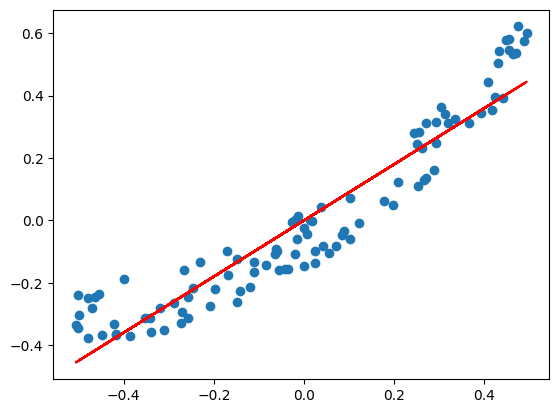

In [111]:
plt.scatter(x_input,y_output)
plt.plot(x_input,h,color="red")


In [112]:
(1/2*m)*np.sum((h - y_output)**2)

46.610015061133545

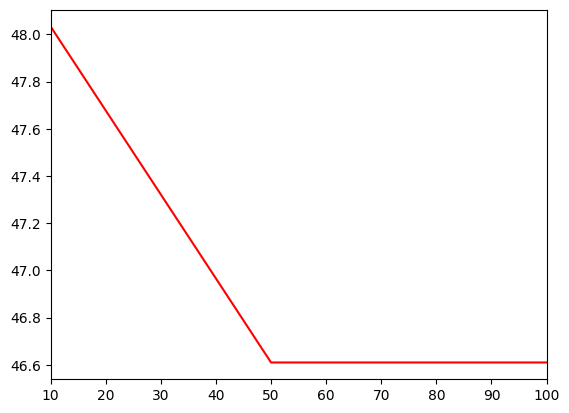

In [122]:
steps = [10,50,70,100]
hy = []
for i in range(len(steps)):
    theta0,theta1=gradient_descent(2,steps[i])
    h = theta1*x_input+theta0
    hy.append((1/2*m)*np.sum((h - y_output)**2))
plt.xlim(10, 100)

plt.plot(steps,hy,color="red")